# Predicting the performance of Students
### Dhivya Rajprasad

http://rstudio-pubs-static.s3.amazonaws.com/234309_d6310e36d1284c54a5955d4f42a0af38.html


## Synopsis

Problem Statement
This project aims to find out the influence of various variables and parameters on the grade of a secondary school student.
The dataset is extensive with atleast 33 different variables which are then filtered for the most obvious predictors and analysis is performed to understand the influence of these predictors on the final grades of the students.

Methodology Employed
1. Simple Exploratory Analysis
2. Interesting Visualizations
3. Decision tree algorithm

Interesting Insights

Some interesting insights were discovered on the following parameters:
1. Gender Based
2. Alcohol consumption
3. Goals of the student
4. Health and attendance in class
5. Access to internet.


## Packages Used
library(prettydoc) #template
library(readr) #for reading in the data
library(dplyr) #exploratory data analysis
library(ggplot2)#visualizations
library(tidyverse)#tidying up the data and exploratory data analysis
library(gsheet)#Reading from google sheets
library(readxl) #Reading in Excel Files
library(knitr) #Kable function for printing tables
library(DT) #Printing dataframes concisely
library(caret) #Dummy Variables for Correlation Matrix
library(gridExtra) #Multiple plots 
library(rpart) #Decision Tree

In [3]:
# install.packages("tidyverse")
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [4]:
#Reading from google sheets
# install.packages("gsheet")
library(gsheet)

Warning message:
"package 'gsheet' was built under R version 3.6.3"

In [5]:
#Kable function for printing tables
# install.packages("knitr")
library(knitr) 

Warning message:
"package 'knitr' was built under R version 3.6.3"

### library(gridExtra)
An individual ggplot object contains multiple pieces – axes, plot panel(s), titles, legends –, and their layout is defined and enforced via the gtable package, itself built around the lower-level grid package. Plots themselves become graphical objects, which can be arranged on a page using e.g. the gridExtra or egg packages, which provide helper functions for such multi-object layouts. The following schematic illustrates the main relations between these packages.
https://cran.r-project.org/web/packages/egg/vignettes/Ecosystem.html

In [6]:
# install.packages("gridExtra")
library(gridExtra) #Multiple plots 

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



## DT: An R interface to the DataTables library
The R package DT provides an R interface to the JavaScript library DataTables. R data objects (matrices or data frames) can be displayed as tables on HTML pages, and DataTables provides filtering, pagination, sorting, and many other features in the tables.

https://rstudio.github.io/DT/

In [7]:
#Printing dataframes concisely
#install.packages("DT")
library(DT) 

Warning message:
"package 'DT' was built under R version 3.6.3"

In [8]:
# install.packages("rpart")
library(rpart) #Decision Tree

Warning message:
"package 'rpart' was built under R version 3.6.3"

In [9]:
# install.packages("ggsci") ## Scientific Journal and Sci-Fi Themed Color Palettes for ggplot2
library(ggsci)

Warning message:
"package 'ggsci' was built under R version 3.6.3"

In [10]:
# install.packages("caret")
library(caret) #Dummy Variables for Correlation Matrix

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



In [11]:
# install.packages("rpart.plot")
library(rpart.plot) 

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

## Data Import

We import the data saved as a zip file from the UCI archives using download.file command which is then unzipped using unzip into the csv file for math scores.

The file is read in to R using read.table and merged to produce the data which will be used for the project.

In [43]:
temp <- tempfile()
# download.file("http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip",temp, mode="wb")
download.file("https://drive.google.com/open?id=19Hxgbf8BdcnWDP_AZ3AF8r_42ezEdWat",temp, mode="wb")
unzip(temp, "student-mat.csv")
data <- read.table("student-mat.csv",sep= ";", header= T)
unlink(temp)
(data <- as_tibble(data))


Warning message in unzip(temp, "student-mat.csv"):
"error 1 al extraer del archivo zip"

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## Description of the data

The dataset is composed of data from two Portuguese Schools namely, Gabriel Pereira HS and Mousinho da Silveira HS and measures the performance in Math.

The dataset is composed of detailed observation for each student across multiple variables like family status and size, performance, alcohol consumption, student’s work situation, parents job situation etc.

The dataset was obtained as part of the study for using Data Mining to Predict Secondary School Student Performance by P.Cortez and A.Silva from two public schools in the school year 2005-2006 from the Alentejo Region of Portugal. Citation:
Using Data Mining To Predict Secondary School Student Alcohol Consumption.

Fabio Pagnotta, Hossain Mohammad Amran
Department of Computer Science,University of Camerino
Two different sources were used:
1. Mark Reports
2. Questionnaires
The first source had scarce information of grades and attendance details and is complemented with the second source which provides the other variables to the data.

## Sampling Information

The questionaires were answered by 788 students in total and 111 answers were discarded due to lack of identification to merge with the mark reports.
The data was then integrated into two different datasets : Mathematics(395 observations) and Portuguese(649 observations).
For the purpose of this project, we will be using the math dataset only.


## Structure and Details of the data

The codebook and data description is provided in the UCI Machine Learning Database
The variables and their classifications are as given below:


In [44]:
variablelist <- gsheet2tbl('https://docs.google.com/spreadsheets/d/1mDsF0aMNgODx7063l2mxV1_zP32fAe_P55SBmtG72G8')
kable(variablelist)



|Attribute Name |Description                                                       |Format Or Data Type |Sample Values                                                                                                      |
|:--------------|:-----------------------------------------------------------------|:-------------------|:------------------------------------------------------------------------------------------------------------------|
|School         |Student’s School                                                  |Factor              |‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira                                                              |
|Sex            |Student’s Sex                                                     |Factor              |‘F’ - female or ‘M’ - male                                                                                         |
|Age            |Student’s Age                                                     |Integer             |numer

Missing data: There is no missing data in the dataset.

In [45]:
sum(is.na(data))

[1] 0

## Data Cleaning

The data is already cleaned and in a tidy format and does not require much cleaning for the data analysis. The majority of the cleaning is done for selecting the necessary variables.

In [46]:
data <- data %>%
  as_tibble()%>%
  select(sex, age, address,Pstatus, Medu, Fedu, Mjob, Fjob,studytime,traveltime,failures,higher,internet, 
         goout, Dalc,Walc,health, absences,G1,G2,G3)
DT::datatable(data)

HTML widgets cannot be represented in plain text (need html)

Effectively, the number of variables that will be used for the analysis has reduced to 21 from 33.

## Data Description
Summary Statistics:

We have chosen 18 different variables as predictors or independant variables which are presented as:
7 categorical variables and 11 numerical variables,

We have also chosen 3 variables as predicted or dependant variables which are presented as:
3 numerical variables- numerical grades of students for exploratory data analysis.

In [47]:
glimpse(data)

Rows: 395
Columns: 21
$ sex        <fct> F, F, F, F, F, M, M, F, M, M, F, F, M, M, M, F, F, F, M,...
$ age        <int> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, ...
$ address    <fct> U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U, U,...
$ Pstatus    <fct> A, T, T, T, T, T, T, A, A, T, T, T, T, T, A, T, T, T, T,...
$ Medu       <int> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3,...
$ Fedu       <int> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2,...
$ Mjob       <fct> at_home, at_home, at_home, health, other, services, othe...
$ Fjob       <fct> teacher, other, other, services, other, other, other, te...
$ studytime  <int> 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 3, 1, 3, 2, 1,...
$ traveltime <int> 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1,...
$ failures   <int> 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,...
$ higher     <fct> yes, yes, yes, yes, yes, yes, yes, yes, yes, yes, yes, y...
$ internet   <fct> no, yes, ye

## Summary:

In [48]:
summary(data)

 sex          age       address Pstatus      Medu            Fedu      
 F:208   Min.   :15.0   R: 88   A: 41   Min.   :0.000   Min.   :0.000  
 M:187   1st Qu.:16.0   U:307   T:354   1st Qu.:2.000   1st Qu.:2.000  
         Median :17.0                   Median :3.000   Median :2.000  
         Mean   :16.7                   Mean   :2.749   Mean   :2.522  
         3rd Qu.:18.0                   3rd Qu.:4.000   3rd Qu.:3.000  
         Max.   :22.0                   Max.   :4.000   Max.   :4.000  
       Mjob           Fjob       studytime       traveltime       failures     
 at_home : 59   at_home : 20   Min.   :1.000   Min.   :1.000   Min.   :0.0000  
 health  : 34   health  : 18   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:0.0000  
 other   :141   other   :217   Median :2.000   Median :1.000   Median :0.0000  
 services:103   services:111   Mean   :2.035   Mean   :1.448   Mean   :0.3342  
 teacher : 58   teacher : 29   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:0.0000  
                

# Simple Exploratory Data Analysis

## 1 Number of Male vs Female Students who failed in the final exam

In [49]:
(data2<-data%>%
 mutate(pass=ifelse(G3>=10,1,0), fail= ifelse(G3<10,1,0))%>%
  filter(sex=="F"|sex=="M")%>%
  group_by(sex)%>%
  summarise(Pass=sum(pass), 
            Fail=sum(fail)))

`summarise()` ungrouping output (override with `.groups` argument)


sex,Pass,Fail
F,133,75
M,132,55


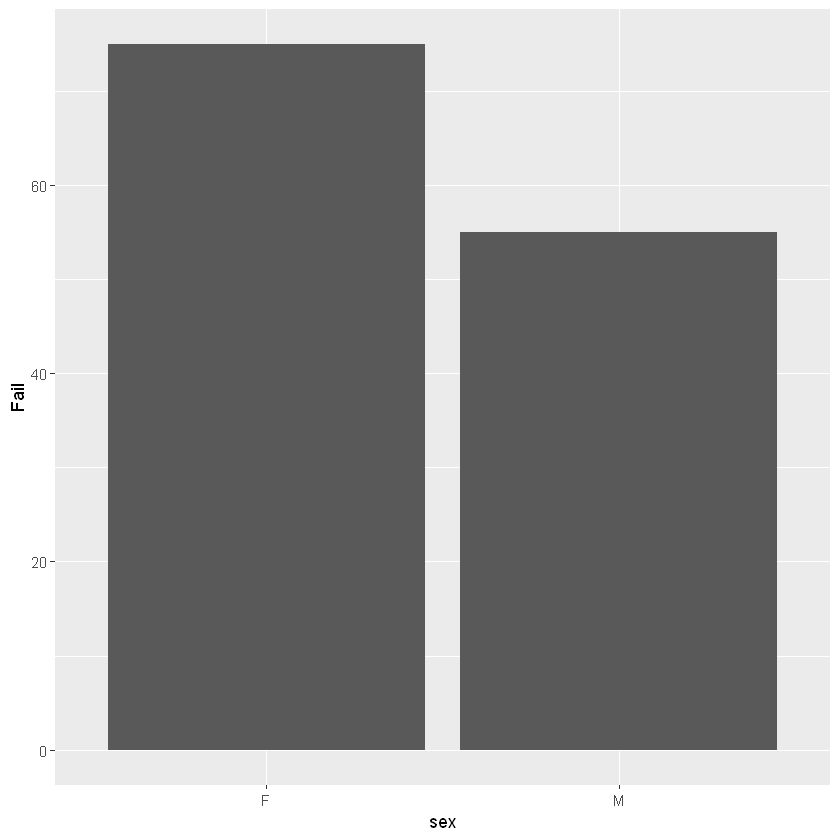

In [50]:
data2%>%
  ggplot(aes(x=sex,y=Fail))+
  geom_bar(stat="identity")

We find that the number of female students who have failed is higher than the number of male students who have failed.

## 2 Average Final Score across different weekend and weekday alcohol consumption levels

In [51]:
data%>%
   group_by(Walc)%>%
  aggregate(G3~Walc, data=., mean)%>%
  arrange(desc(G3))

Walc,G3
1,10.735099
3,10.725000
5,10.142857
2,10.082353
4,9.686275


In [52]:
data%>%
   group_by(Dalc)%>%
  aggregate(G3~Dalc, data=., mean)%>%
  arrange(desc(G3))

Dalc,G3
1,10.731884
5,10.666667
3,10.500000
4,9.888889
2,9.253333


We find that the average grade decreases as the alcohol consumption in weekend increases whereas a very clear trend cannot be established for Weekday.

## 3 Relationship between going out and average grade of the students

In [53]:
data$goout <- as.factor(data$goout)
data%>%
   group_by(goout)%>%
   summarise(AverageScore= mean(G3,na.rm=TRUE))%>%
  arrange(desc(AverageScore))

`summarise()` ungrouping output (override with `.groups` argument)


goout,AverageScore
2,11.194175
3,10.961538
1,9.869565
4,9.651163
5,9.037736


We see that Going Out does have an impact on the average grades in the final exam as the number of days of going out increases beyond 3, the average grades of students are also decreasing.

## Data Analysis Through Visualizations
This project will concentrate on several aspects which will affect a students performance and correlation between these factors.

## 1 Correlation between alcohol consumption and performance of the students with differences in gender

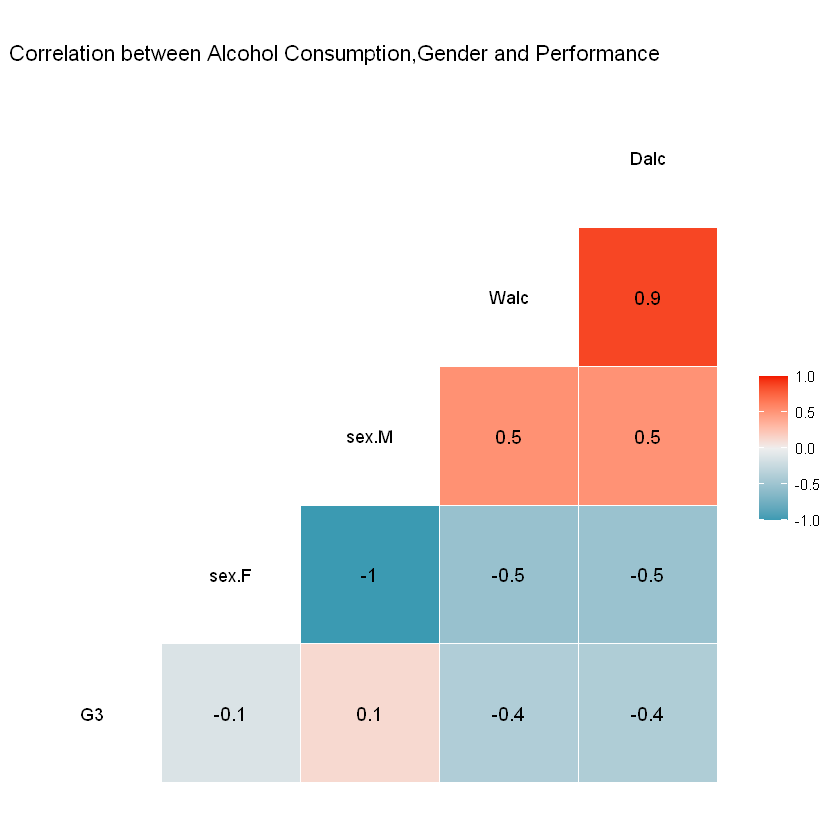

In [54]:
dmy <- dummyVars("~.", data=data)
newdata <- data.frame(predict(dmy, newdata=data))
correl1 <-cor(newdata[,c("G3","sex.F","sex.M","Walc","Dalc")])
source("https://raw.githubusercontent.com/briatte/ggcorr/master/ggcorr.R")
correl1 %>%
  ggcorr(label = TRUE)+ ggtitle("Correlation between Alcohol Consumption,Gender and Performance")

We find that Gender has a lower correlation with respect to performance as compared to Alcohol Consumption. We find that both Weekend and Workday Alchol Consumption is highly negatively correlated with the grades.

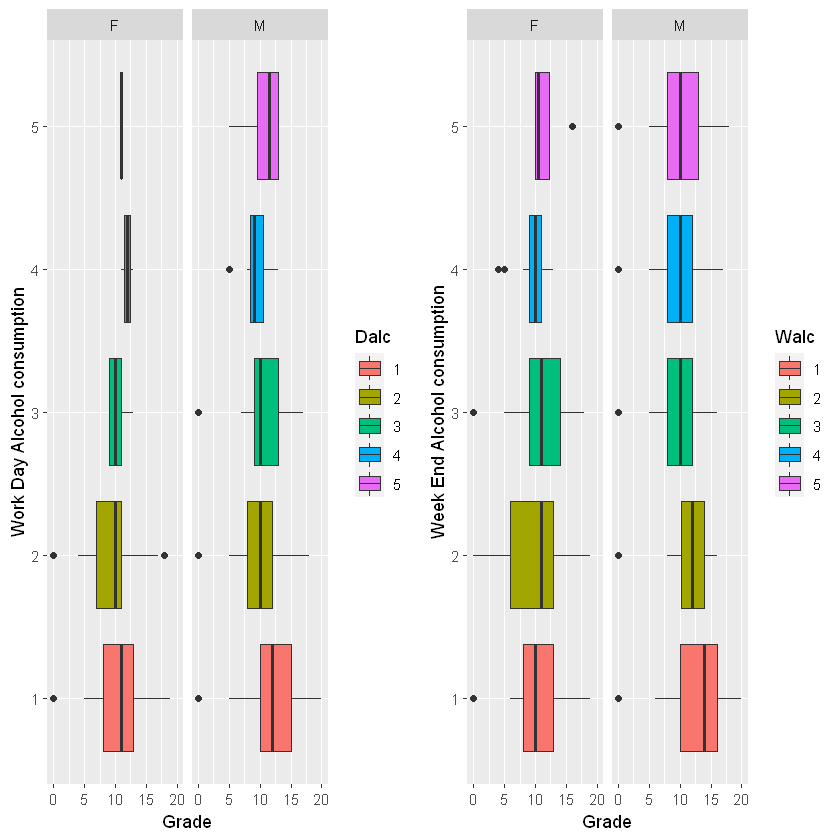

In [55]:
data$Dalc <- as.factor(data$Dalc)
data$Walc <- as.factor(data$Walc)
g1a<-data %>%
  ggplot(aes(x=Dalc, y=G3, fill= Dalc))+
  geom_boxplot()+
  coord_flip()+
      xlab("Work Day Alcohol consumption")+
      ylab("Grade")+
  facet_grid(~sex)
g1b<-data %>%
  ggplot(aes(x=Walc, y=G3, fill= Walc))+
  geom_boxplot()+
  coord_flip()+
      xlab("Week End Alcohol consumption")+
      ylab("Grade")+
  facet_grid(~sex)
grid.arrange(g1a,g1b,ncol=2)

2 Relationship between the consumption of alcohol by students and the set up in which they live :urban vs rural and the relationship to performance in school.

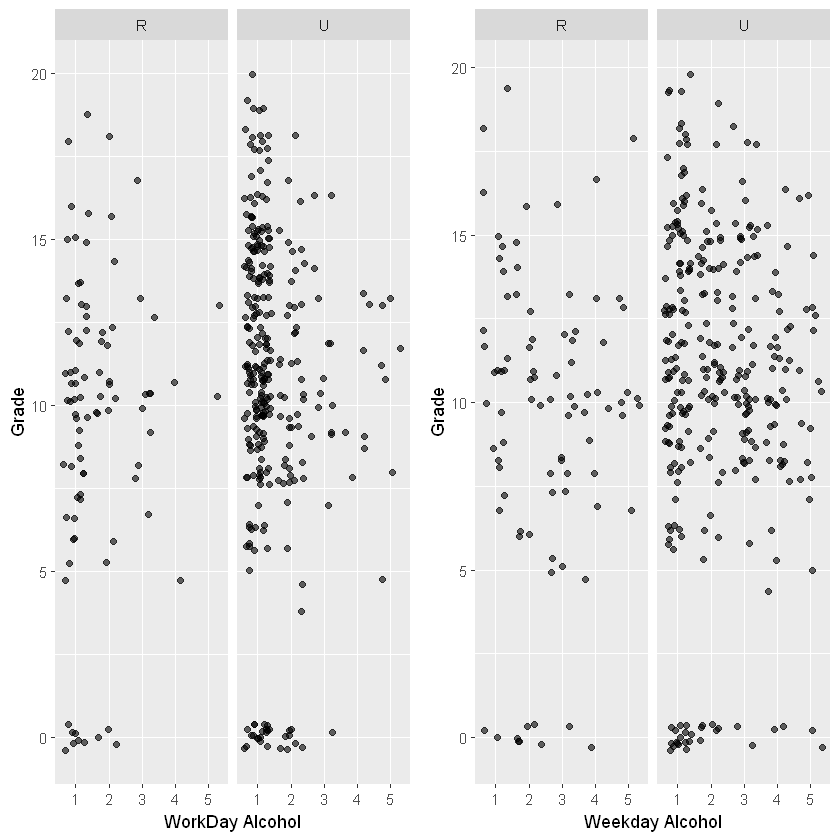

In [56]:
g2a<-data %>% 
  group_by(address)%>%
  ggplot(aes(x=factor(Dalc), y= G3))+
           geom_jitter(alpha=0.6)+
    scale_x_discrete("WorkDay Alcohol")+
    scale_y_continuous("Grade")+
    facet_grid(~address)
 g2b<-data %>% 
   group_by(address)%>%
   ggplot(aes(x=factor(Walc), y= G3))+
           geom_jitter(alpha=0.6)+
    scale_x_discrete("Weekday Alcohol")+
    scale_y_continuous("Grade")+
    facet_grid(~address)
grid.arrange(g2a,g2b,ncol=2)

We see that students from Urban Areas have more alcohol consumption than students from Rural Areas. We also find that the final grades start decreasing as the level of alcohol consumption increases.

3 The current performance Vs future goals of the student based on gender of the student

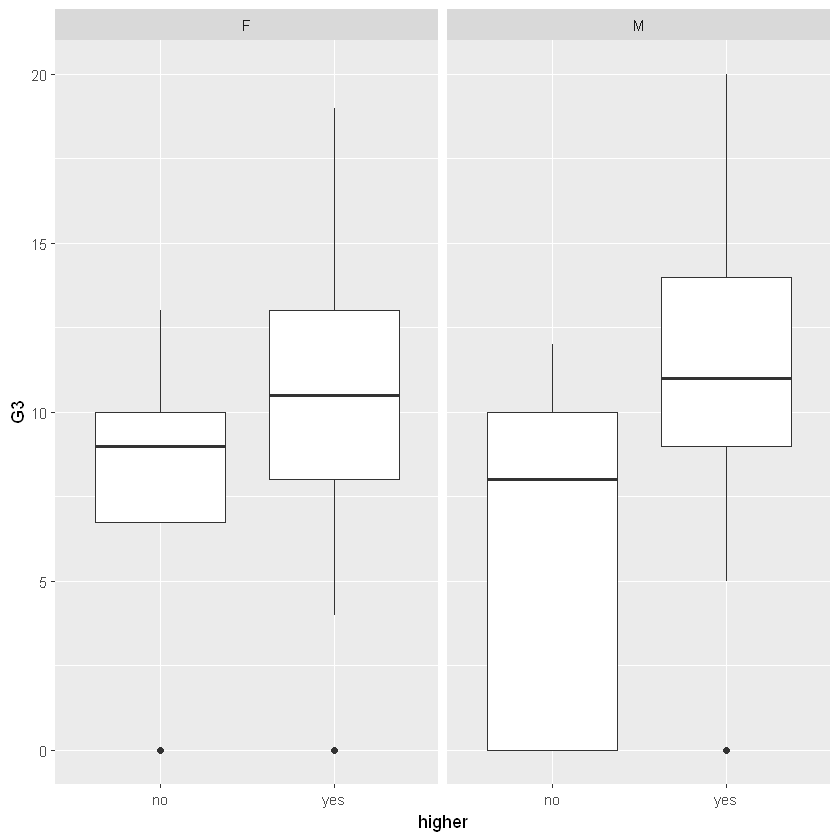

In [57]:
data%>%
  ggplot(aes(x=higher, y=G3))+
  geom_boxplot()+
  facet_grid(~sex)

We find that on an average, students who are planning on a higher education perform better than those who do not. We also find that Male students outperform female students when they plan to go for higher education and viceversa if not.

4 The relationship between health and attendance in class and the gender of the student.

`geom_smooth()` using formula 'y ~ x'


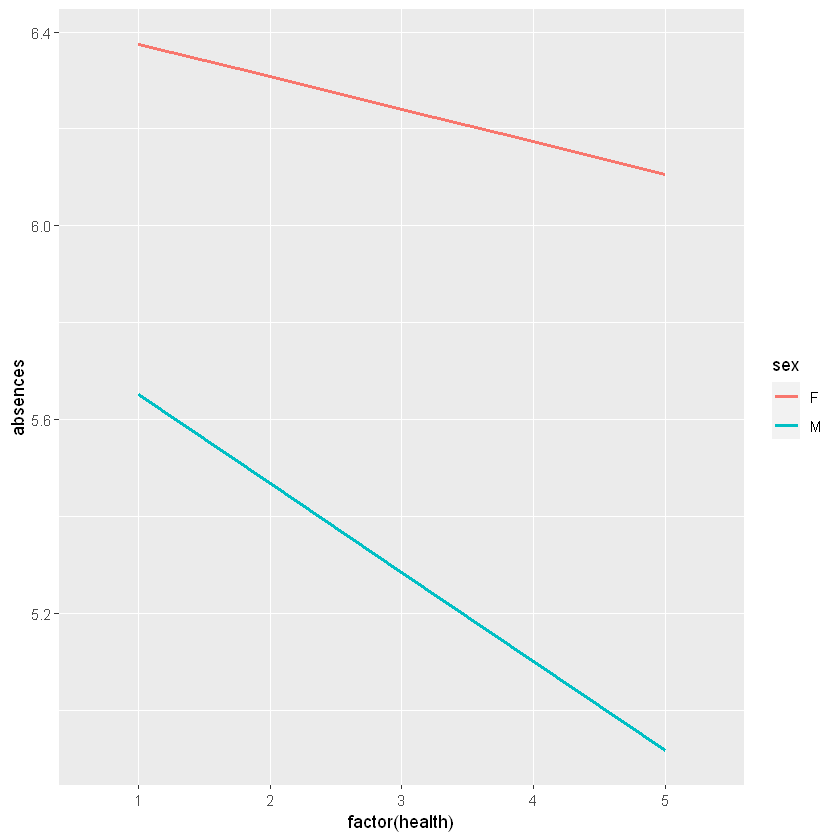

In [58]:
data%>%
  group_by(sex)%>%
  ggplot(aes(x=factor(health), y=absences, color=sex))+
  geom_smooth(aes(group=sex), method="lm", se=FALSE)

We find that female students have lower attendance on average and as the health scale increases, the absence decreases as expected for both male and female students.

5 Relationship between access to internet and the performance of the students.

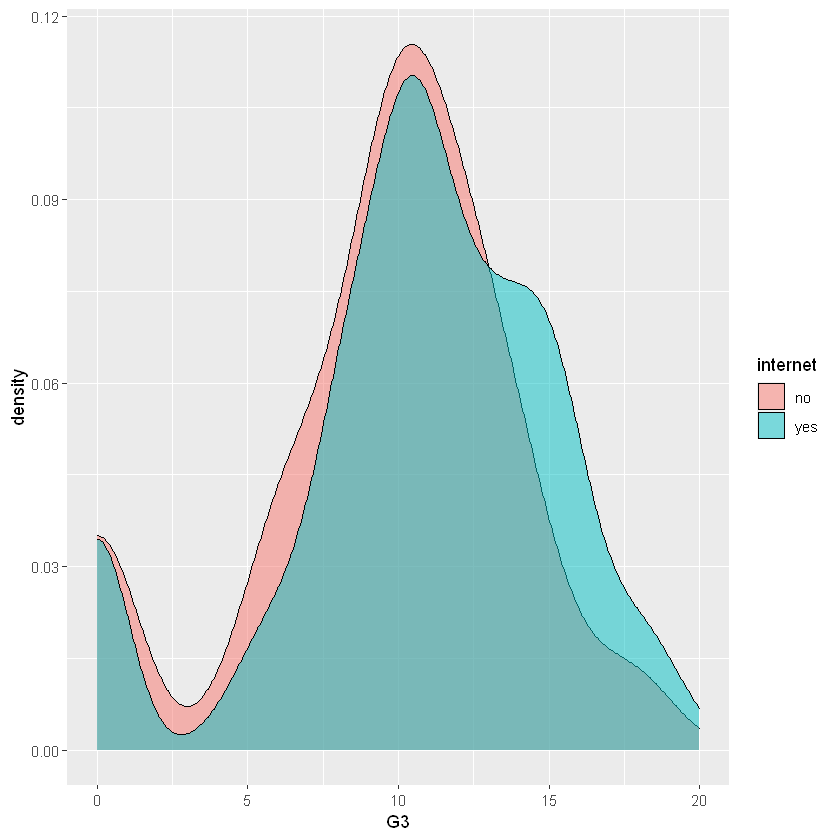

In [59]:
data%>%
  group_by(internet)%>%
  ggplot(aes(x=G3, fill=internet))+
  geom_density( alpha=0.5)

We find that the presence of internet is actually detrimental to the average grades of the student.

# Decision Tree Analysis
We use R to create Decision Trees to predict the final performance grade using all the variables in the dataset.

Methodology Used
Classification methodology was used for this particular data and the the response variable grade is modeled as a binary variable.

Advantages of using Decision Trees for this Analysis
Simplicity of Interpretation: The entire data is represented in a visual format which enables us to understand the data quickly and make a prediction.
Ability to use both numeric and categorical variables as predictors: Our data is a mix of categorical and numeric variables and other commonly used methods such as linear or logistic regressions can use either of these categories but not both in a single algorithm.

Algorithm behind
The package used to construct the tree here is Rpart which uses recursive partitioning of the data with the default criterion being used for each split being Gini Coefficient.

Variables used
We create the tree using all the variables and rank the variables in terms of importance to figure out the variables used by the decision tree algorithm to predict the income.

In [60]:
library(caret)
newdata<- data%>%select(sex, age, address,Pstatus, Medu, Fedu, Mjob, Fjob,studytime,traveltime,failures,higher,internet, 
         goout, Dalc,Walc,health, absences,G1, G2, G3)
tree <- rpart(G3 ~ .,
              data = newdata,
              method = "class")
imp <- varImp(tree)
rownames(imp)[order(imp$Overall, decreasing=TRUE)]

[1] "G2"         "G1"         "absences"   "Walc"       "failures"  
 [6] "Fjob"       "Mjob"       "Dalc"       "Medu"       "health"    
[11] "studytime"  "goout"      "traveltime" "sex"        "age"       
[16] "address"    "Pstatus"    "Fedu"       "higher"     "internet"

We find that Grades in 1st and 2nd exam are key predictors followed by attendance levls,alcohol consumption and jobs of parents.
The tree logic is as below where only “attendance, Father’s job, Grades in 1st and 2nd Exam” are used as variables by the tree based on correlation and collinearity between some of the other variables.

In [61]:
printcp(tree)


Classification tree:
rpart(formula = G3 ~ ., data = newdata, method = "class")

Variables actually used in tree construction:
[1] absences Fjob     G1       G2      

Root node error: 339/395 = 0.85823

n= 395 

        CP nsplit rel error  xerror     xstd
1 0.094395      0   1.00000 1.00000 0.020450
2 0.067847      1   0.90560 0.90560 0.024396
3 0.060472      2   0.83776 0.83776 0.026353
4 0.032448      4   0.71681 0.74336 0.028175
5 0.026549      7   0.61947 0.69322 0.028780
6 0.022124      9   0.56637 0.67847 0.028914
7 0.011799     11   0.52212 0.59587 0.029306
8 0.010000     13   0.49853 0.60472 0.029292


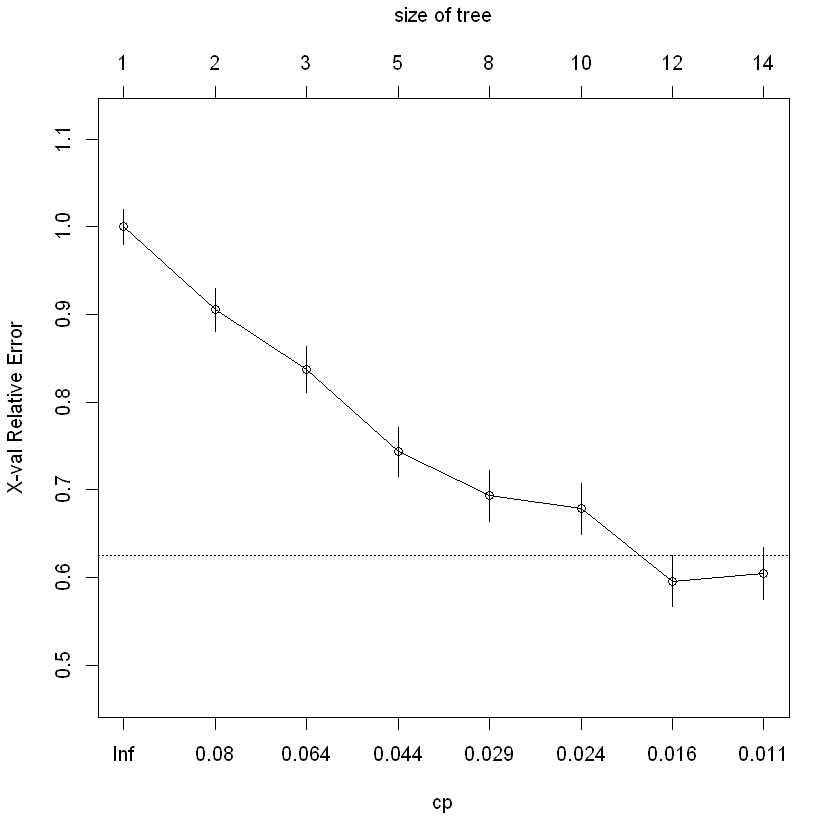

In [62]:
plotcp(tree)

## Summary
Problem Statement
We find that some variables are highly correlated with others and hence do not make a significant impact in predicting the final grades. Different tabular and visual interpretations were made to analyze the relatioship between the different variables towards predicting or influencing the grade of a student.

Methodology Used
1. Simple Exploratory Analysis is first done to slice and dice the data for different predictors and results are presented in tables.
2. Interesting Visualizations are employed to find out the inter relationship between different varaiables and hence their effect on the grades and other factors.
3. Decision tree algorithm is used to predict the grades based on certain important variables as chosen by the algorithm due to the correlation and collinearity exhibited by the variables.

Insights Provided
1.Gender Based: We find that more female students tend to fail in the final exam as compared to male students but the gender does not seem to have as much as a correlation to predict the grades as alcohol consumption. We also find the attendance level of female students is lesser than male students and male students with a plan of higher education outperform female students.
2.Alcohol consumption: We find a clear detrimental impact on grades due to the consumption of alcohol during weekend but a clear trend cannot be established for weekdays. The alcohol consumption also increases in urban settings when compared to rural settings.
3.Goals of the student: We find that on an average, students who are planning on a higher education perform better than those who do not.
4.Health and attendance in class: As expected, as health condition detoriates, we find that the number of absences increases.
5. Access to internet: Access to internet has a detroriating effect on the performance of the students as their average grades are lesser than those without access to internet.

We find that the variables which actually impact the prediction of final grades are Absences, Fathers’ job and Grades in Exam 1 and Exam 2 as found in decision trees algorithm.

# Adicional , de mi aportación pra pruebas ...

Warning message:
"All boxes will be white (the box.palette argument will be ignored) because
the number of classes in the response 18 is greater than length(box.palette) 6.
To silence this warning use box.palette=0 or trace=-1."Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

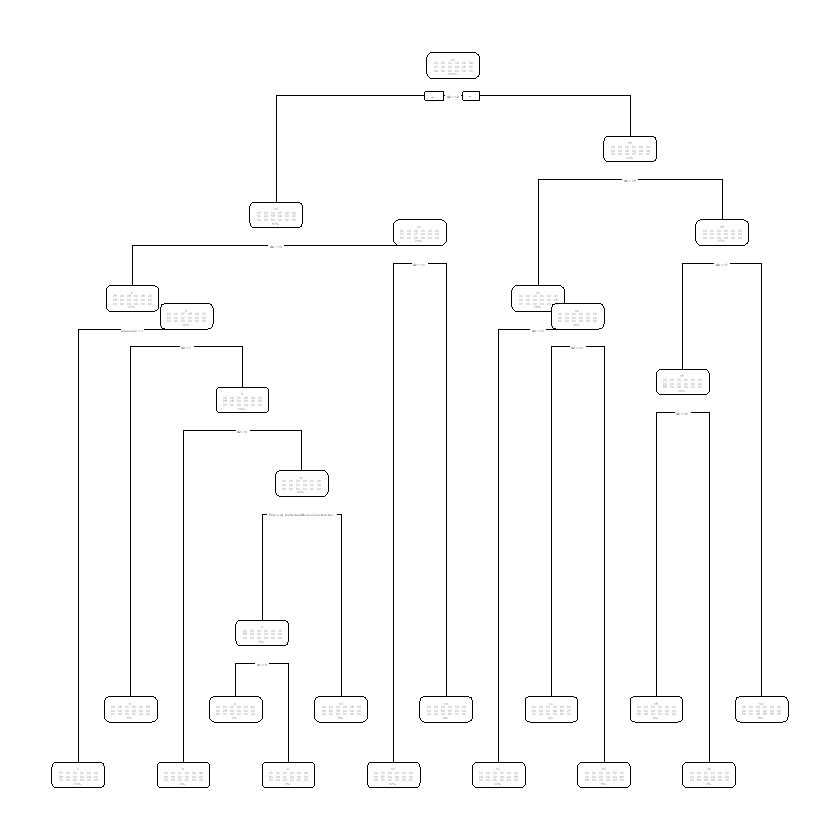

In [63]:
rpart.plot(tree)